# Example behavior session
The following example shows how to access behavioral data for a given mouse across sessions

The following assumes that the AllenSDK has been installed in your environment. If not, run:

    pip install allensdk

## imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)

import allensdk.brain_observatory.behavior.behavior_project_cache as bpc

import allensdk
import pkg_resources
print('allensdk version 2.10.2 or higher is required, you have {} installed'.format(pkg_resources.get_distribution("allensdk").version))

allensdk version 2.10.2 or higher is required, you have 2.10.2 installed


In [2]:
%matplotlib notebook

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## load cache, get behavior session table
This will set a location on your local drive to cache NWB files.  
Then a table of all behavior sessions will be loaded.  

In [4]:
# choose a location on your file system to cache NWB files as they are loaded:
my_cache_dir = A_PATH_TO_SOME_LOCAL_FOLDER

bc = bpc.VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=my_cache_dir)
          
behavior_session_table = bc.get_behavior_session_table()   

## view a sample of the behavior session table
The `behavior_session_table` is a Pandas DataFrame with one row for every session and a collection of informative columns. We can view 10 randomly selected rows of the table using the Pandas `sample` command.  
It's important to note that this table contains every session, including sessions performed on a two-photon imaging rig (`session_type` starts with `OPHYS_`) and pre-imaging (aka 'training') sessions, (`session_type` starts with `TRAINING_`).

In [5]:
behavior_session_table.sample(10)

,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,session_type,cre_line,indicator,session_number,prior_exposures_to_session_type,prior_exposures_to_image_set,prior_exposures_to_omissions,ophys_session_id,ophys_experiment_id,ophys_container_id,project_code,date_of_acquisition,file_id
behavior_session_id,,,,,,,,,,,,,,,,,,,,
939977516,BEH.B-Box6,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,476970,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,97.0,TRAINING_1_gratings,Sst-IRES-Cre,GCaMP6f,NaN,7,NaN,0,NaN,NaN,NaN,NaN,2019-09-05 12:52:50.080,1.085374e+09
966814252,BEH.F-Box4,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,482853,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,106.0,TRAINING_5_images_A_handoff_ready,Sst-IRES-Cre,GCaMP6f,NaN,1,NaN,0,NaN,NaN,NaN,NaN,2019-10-14 13:51:16.748,1.081756e+09
904950235,BEH.G-Box4,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,467953,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],M,87.0,TRAINING_1_gratings,Vip-IRES-Cre,GCaMP6f,NaN,2,NaN,0,NaN,NaN,NaN,NaN,2019-07-12 15:08:08.620,1.085371e+09
857612105,BEH.B-Box5,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,435431,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],M,160.0,TRAINING_4_images_A_training,Vip-IRES-Cre,GCaMP6f,NaN,14,NaN,0,NaN,NaN,NaN,NaN,2019-04-25 15:13:52.914,1.081601e+09
935601725,CAM2P.3,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,459777,Ai93(TITL-GCaMP6f),"[Slc17a7-IRES2-Cre, Camk2a-tTA]",F,175.0,OPHYS_0_images_A_habituation,Slc17a7-IRES2-Cre,GCaMP6f,0.0,3,3.0,0,NaN,NaN,NaN,NaN,2019-08-30 08:56:11.549,1.085370e+09
880191852,BEH.B-Box5,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,453989,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],M,115.0,TRAINING_2_gratings_flashed,Vip-IRES-Cre,GCaMP6f,NaN,13,NaN,0,NaN,NaN,NaN,NaN,2019-06-03 12:47:43.079,1.081624e+09
972527218,BEH.D-Box6,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,476970,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,146.0,TRAINING_5_images_B_handoff_lapsed,Sst-IRES-Cre,GCaMP6f,NaN,2,NaN,0,NaN,NaN,NaN,NaN,2019-10-24 11:43:27.801,1.081760e+09
1041490593,CAM2P.3,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,513626,Ai93(TITL-GCaMP6f),"[Slc17a7-IRES2-Cre, Camk2a-tTA]",M,211.0,OPHYS_1_images_B,Slc17a7-IRES2-Cre,GCaMP6f,1.0,0,3.0,0,NaN,NaN,NaN,NaN,2020-08-07 11:51:28.681,1.081782e+09
868653129,BEH.B-Box3,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,456916,Ai93(TITL-GCaMP6f),"[Slc17a7-IRES2-Cre, Camk2a-tTA]",F,83.0,TRAINING_1_gratings,Slc17a7-IRES2-Cre,GCaMP6f,NaN,2,NaN,0,NaN,NaN,NaN,NaN,2019-05-15 11:56:15.879,1.085367e+09


## randomly select one mouse
We'll choose one mouse id from the full list of unique mouse IDs in the dataset

In [6]:
np.random.seed(5)
mouse_id = np.random.choice(behavior_session_table['mouse_id'].unique())
mouse_id

445002

## query the full behavior sessions table for all sessions that this mouse performed
This will return a subset of the full `behavior_session_table` in which the mouse_id matches our `mouse_id` variable (mouse 445002). The table should be returned in order of date of acquisition, but we'll call use the Pandas command `sort_values(by = 'date_of_acquisition')` just to be sure.  

What we then see is a table that has metadata for every session performed by this mouse, in sequential order. The `equipment_name` column tells us where the session was run on that day and the `session_type` column tells us the name of the session type. See the technical white paper for a description of the progression of stages.

For this mouse, we can see that it progressed through a series of training stages starting on 3/15/2019 in behavior training boxes `BEH.B-Box3` and `BEH.B-Box1`.

On 4/1/2019, it reached the `TRAINING_5_images_A_handoff_ready`, which meant that it was ready for transition to an imaging rig as soon as space became available. 

On 4/4/2019, it was transitioned to ophys rig `CAM2P.3`, where it then underwent three days of habituation without imaging. This is evidenced by the fact that the session type for 4/4/2019, 4/5/2019, and 4/8/2019 was `OPHYS_0_images_A_habituation` and there was no associated `ophys_session_id`.

The first day of imaging for this mouse was on 4/9/2019, with `session_type = OPHYS_1_images_A`.

Note that this mouse has two `OPHYS_5_images_B_passive` sessions, the first taken in order (immediately after `OPHYS_4_images_B`), and second taken at the end of the sequence. The first `OPHYS_5_images_B_passive` does not have an `ophys_session_id` associated with it. This is likely due to that first session failing to meet quality control standards and being excluded from the dataset. The second `OPHYS_5_images_B_passive` was likely a retake, taken after the first was identified as having been failed.  

In general, ophys behavior sessions that do not have associated ophys_session_ids are sessions for which the ophys data has been removed do to failure to meet quality control standards.

In [7]:
this_mouse_table = behavior_session_table.query('mouse_id == @mouse_id').sort_values(by = 'date_of_acquisition')
# note that the following is functionally equivalent if you find the syntax easier to read: 
# this_mouse_table = behavior_session_table[behavior_session_table['mouse_id'] == mouse_id]
this_mouse_table

,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,session_type,cre_line,indicator,session_number,prior_exposures_to_session_type,prior_exposures_to_image_set,prior_exposures_to_omissions,ophys_session_id,ophys_experiment_id,ophys_container_id,project_code,date_of_acquisition,file_id
behavior_session_id,,,,,,,,,,,,,,,,,,,,
837658854,BEH.B-Box3,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,445002,Ai93(TITL-GCaMP6f),"[Slc17a7-IRES2-Cre, Camk2a-tTA]",M,72.0,TRAINING_0_gratings_autorewards_15min,Slc17a7-IRES2-Cre,GCaMP6f,NaN,0,NaN,0,NaN,NaN,NaN,NaN,2019-03-15 14:49:24.015,1.085362e+09
838515247,BEH.B-Box1,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,445002,Ai93(TITL-GCaMP6f),"[Slc17a7-IRES2-Cre, Camk2a-tTA]",M,75.0,TRAINING_1_gratings,Slc17a7-IRES2-Cre,GCaMP6f,NaN,0,NaN,0,NaN,NaN,NaN,NaN,2019-03-18 13:44:01.474,1.085362e+09
839219841,BEH.B-Box1,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,445002,Ai93(TITL-GCaMP6f),"[Slc17a7-IRES2-Cre, Camk2a-tTA]",M,76.0,TRAINING_1_gratings,Slc17a7-IRES2-Cre,GCaMP6f,NaN,1,NaN,0,NaN,NaN,NaN,NaN,2019-03-19 12:50:12.068,1.085362e+09
839565422,BEH.B-Box1,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,445002,Ai93(TITL-GCaMP6f),"[Slc17a7-IRES2-Cre, Camk2a-tTA]",M,77.0,TRAINING_1_gratings,Slc17a7-IRES2-Cre,GCaMP6f,NaN,2,NaN,0,NaN,NaN,NaN,NaN,2019-03-20 13:16:44.461,1.085362e+09
839912316,BEH.B-Box1,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,445002,Ai93(TITL-GCaMP6f),"[Slc17a7-IRES2-Cre, Camk2a-tTA]",M,78.0,TRAINING_2_gratings_flashed,Slc17a7-IRES2-Cre,GCaMP6f,NaN,0,NaN,0,NaN,NaN,NaN,NaN,2019-03-21 12:54:25.388,1.081589e+09
840581827,BEH.B-Box1,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,445002,Ai93(TITL-GCaMP6f),"[Slc17a7-IRES2-Cre, Camk2a-tTA]",M,79.0,TRAINING_2_gratings_flashed,Slc17a7-IRES2-Cre,GCaMP6f,NaN,1,NaN,0,NaN,NaN,NaN,NaN,2019-03-22 12:56:37.162,1.081589e+09
841426832,BEH.B-Box1,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,445002,Ai93(TITL-GCaMP6f),"[Slc17a7-IRES2-Cre, Camk2a-tTA]",M,82.0,TRAINING_3_images_A_10uL_reward,Slc17a7-IRES2-Cre,GCaMP6f,NaN,0,NaN,0,NaN,NaN,NaN,NaN,2019-03-25 13:33:53.275,1.081589e+09
841827774,BEH.B-Box1,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,445002,Ai93(TITL-GCaMP6f),"[Slc17a7-IRES2-Cre, Camk2a-tTA]",M,83.0,TRAINING_3_images_A_10uL_reward,Slc17a7-IRES2-Cre,GCaMP6f,NaN,1,NaN,0,NaN,NaN,NaN,NaN,2019-03-26 12:43:01.470,1.081590e+09
842385277,BEH.B-Box1,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,445002,Ai93(TITL-GCaMP6f),"[Slc17a7-IRES2-Cre, Camk2a-tTA]",M,84.0,TRAINING_3_images_A_10uL_reward,Slc17a7-IRES2-Cre,GCaMP6f,NaN,2,NaN,0,NaN,NaN,NaN,NaN,2019-03-27 12:13:04.923,1.081591e+09


## iterate over all sessions for this mouse, build a `behavior_session_dict` which will have one behavior session object for every session that this mouse performed, with the key being the `behavior_session_id`
Note that this could take many minutes to complete. For each session in our new table, `this_mouse_table`, we are pulling the behavior session NWB file from AWS, opening it as a BehaviorSession object using the AllenSDK, and also caching a copy of the NWB file in the directory specified above as `my_cache_dir`. When the below cell completes, all behavior sessions for this mouse will be held in memory in the `behavior_session_dict` dictionary.  

If you were to re-run this cell a second time, it would access your cached NWB files instead of downloading them from AWS, allowing it to run substantially faster.  

It is important to note that we will only be loading the behavior data here, even for sessions that had corresponding imaging data. The `get_behavior_ophys_experiment` method would be used to get behavior *and* ophys data for ophys sessions. See additional sample notebooks for details.

In [8]:
behavior_session_ids = this_mouse_table.index.values
behavior_session_dict = {}
for behavior_session_id in behavior_session_ids:
    behavior_session_dict[behavior_session_id] = bc.get_behavior_session(behavior_session_id)

## We can view all attributes of the behavior session object
These are all of the methods and attributes available on the BehaviorSession object. Not all are explored in this notebook.

In [28]:
behavior_session_id = behavior_session_ids[-1]
behavior_session_dict[behavior_session_id].list_data_attributes_and_methods()

['behavior_session_id',
 'get_performance_metrics',
 'get_reward_rate',
 'get_rolling_performance_df',
 'licks',
 'metadata',
 'raw_running_speed',
 'rewards',
 'running_speed',
 'stimulus_presentations',
 'stimulus_templates',
 'stimulus_timestamps',
 'task_parameters',
 'trials']

Note that any attribute can be followed by a `?` in a Jupyter Notebook to see the docstring. For example, running the cell below will make a frame appear at the bottom of your browser with the docstring for the `running_speed` attribute.

In [29]:
behavior_session = behavior_session_dict[behavior_session_id]
behavior_session.running_speed?

#### here are some basic task parameters
We can see the session_type, which is `OPHYS_5_images_B_passive` and a number of other task parameters.

In [30]:
behavior_session_dict[behavior_session_id].task_parameters

{'stimulus': 'images',
 'task': 'change detection',
 'response_window_sec': [0.15, 0.75],
 'reward_volume': 0.007,
 'omitted_flash_fraction': 0.05,
 'blank_duration_sec': [0.5, 0.5],
 'auto_reward_volume': 0.005,
 'n_stimulus_frames': 69255,
 'stimulus_duration_sec': 0.25,
 'stimulus_distribution': 'geometric',
 'session_type': 'OPHYS_5_images_B_passive'}

## Look at some of the attributes of the last 'handoff ready session'
We can filter the full table to get the last `TRAINING_5_images_A_handoff_ready` session. This would have been the last training session before the animal was subsequently handed off to the imaging team, after which all sessions were performed on a two-photon imaging rig.

In [12]:
behavior_session_id = this_mouse_table.query('session_type == "TRAINING_5_images_A_handoff_ready"').index[-1]
# note that the following is functionally equivalent if you find the syntax easier to read: 
# behavior_session_id = this_mouse_table[this_mouse_table['session_type'] == "TRAINING_5_images_A_handoff_ready"].index[-1]
dataset = behavior_session_dict[behavior_session_id]

### stimuli

In [13]:
dataset.stimulus_presentations.head(5)

,duration,end_frame,image_index,image_name,image_set,index,omitted,start_frame,start_time,stop_time
stimulus_presentations_id,,,,,,,,,,
0,0.250208,18000.0,0,im065,Natural_Images_Lum_Matched_set_training_2017.0...,0,False,17985.0,300.001180,300.251388
1,0.250228,18045.0,0,im065,Natural_Images_Lum_Matched_set_training_2017.0...,1,False,18030.0,300.751814,301.002042
2,0.250259,18090.0,0,im065,Natural_Images_Lum_Matched_set_training_2017.0...,2,False,18075.0,301.502388,301.752647
3,0.250277,18136.0,0,im065,Natural_Images_Lum_Matched_set_training_2017.0...,3,False,18121.0,302.269753,302.520030
4,0.250199,18181.0,0,im065,Natural_Images_Lum_Matched_set_training_2017.0...,4,False,18166.0,303.020392,303.270591


### licks

In [14]:
dataset.licks.sample(5)

,timestamps,frame
1240,1570.283190,94138
470,722.889309,43337
503,780.270804,46777
1252,1580.992166,94780
1257,1581.726111,94824


### rewards

In [15]:
dataset.rewards.sample(5)

,volume,timestamps,autorewarded
100,0.007,2041.578365,False
29,0.007,813.631992,False
6,0.007,401.736694,False
24,0.007,720.820943,False
25,0.007,761.721954,False


### running data

In [16]:
dataset.running_speed.head()

,timestamps,speed
0,0.000000,0.010719
1,0.016554,-0.034077
2,0.033231,-0.079193
3,0.049912,-0.121338
4,0.067623,-0.156735


### we can make a simple plot where we combine together running, licking and stimuli

#### First, add a column to the stimulus_presentations table that assigns a unique color to every stimulus

In [17]:
unique_stimuli = [stimulus for stimulus in dataset.stimulus_presentations['image_name'].unique()]
colormap = {image_name: sns.color_palette()[image_number] for image_number, image_name in enumerate(np.sort(unique_stimuli))}
dataset.stimulus_presentations['color'] = dataset.stimulus_presentations['image_name'].map(lambda image_name: colormap[image_name])

#### now make some simple plotting functions to plot these datastreams

In [18]:
def plot_running(ax, initial_time, final_time):
    '''
    a simple function to plot running speed between two specified times on a specified axis
    inputs:
        ax: axis on which to plot
        intial_time: initial time to plot from
        final_time: final time to plot to
    '''
    running_sample = dataset.running_speed.query('timestamps >= @initial_time and timestamps <= @final_time')
    ax.plot(
        running_sample['timestamps'],
        running_sample['speed']
    )

def plot_licks(ax, initial_time, final_time):
    '''
    a simple function to plot licks as dots between two specified times on a specified axis
    inputs:
        ax: axis on which to plot
        intial_time: initial time to plot from
        final_time: final time to plot to
    '''
    licking_sample = dataset.licks.query('timestamps >= @initial_time and timestamps <= @final_time')
    ax.plot(
        licking_sample['timestamps'],
        np.zeros_like(licking_sample['timestamps']),
        marker = 'o',
        color = 'black',
        linestyle = 'none'
    )
    
def plot_rewards(ax, initial_time, final_time):
    '''
    a simple function to plot rewards between two specified times as blue diamonds on a specified axis
    inputs:
        ax: axis on which to plot
        intial_time: initial time to plot from
        final_time: final time to plot to
    '''
    rewards_sample = dataset.rewards.query('timestamps >= @initial_time and timestamps <= @final_time')
    ax.plot(
        rewards_sample['timestamps'],
        np.zeros_like(rewards_sample['timestamps']),
        marker = 'd',
        color = 'blue',
        linestyle = 'none',
        markersize = 12,
        alpha = 0.5
    )
    
def plot_stimuli(ax, ti, tf):
    '''
    a simple function to plot stimuli as colored vertical spans on a s
    inputs:
        ax: axis on which to plot
        intial_time: initial time to plot from
        final_time: final time to plot to
    '''
    stimulus_presentations_sample = dataset.stimulus_presentations.query('stop_time >= @initial_time and start_time <= @final_time')
    for idx, stimulus in stimulus_presentations_sample.iterrows():
        ax.axvspan(stimulus['start_time'], stimulus['stop_time'], color=stimulus['color'], alpha=0.25)

#### now make the plot

<IPython.core.display.Javascript object>


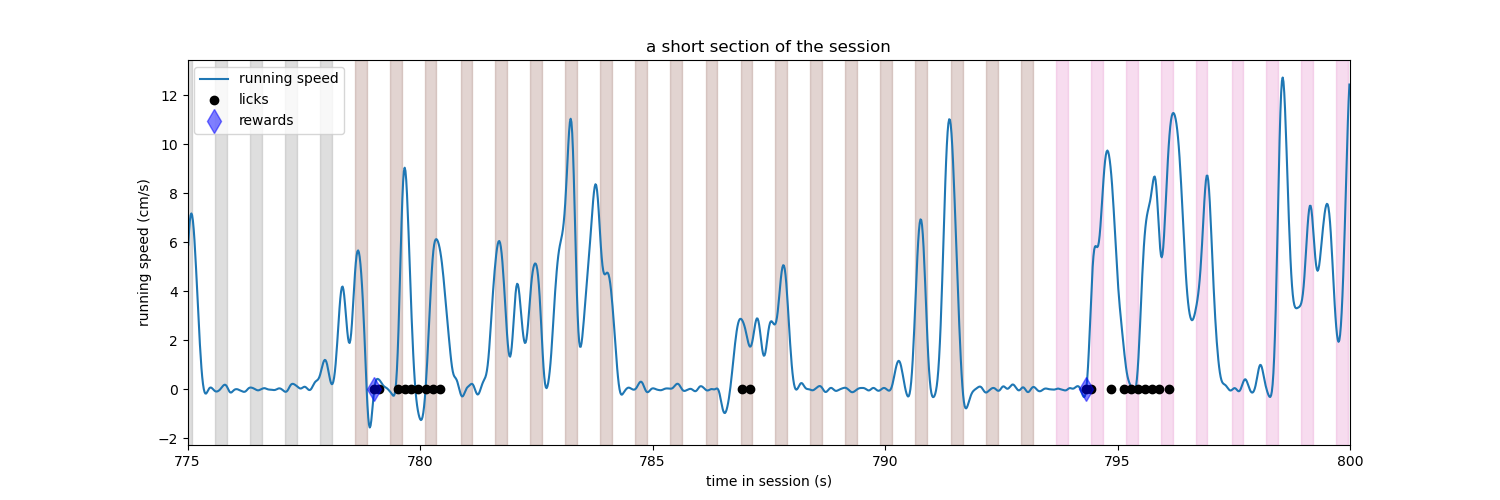

In [19]:
initial_time = 775 # initial time for plot, in seconds
final_time = 800 # final time for plot, in seconds
fig, ax = plt.subplots(figsize = (15,5))
plot_running(ax, initial_time, final_time)
plot_licks(ax, initial_time, final_time)
plot_rewards(ax, initial_time, final_time)
plot_stimuli(ax, initial_time, final_time)

ax.legend(['running speed', 'licks', 'rewards'])

ax.set_ylabel('running speed (cm/s)')
ax.set_xlabel('time in session (s)')
ax.set_xlim(initial_time, final_time)
ax.set_title('a short section of the session');

Above, we can see that stimuli were being delivered at a regular cadence (250 ms on, 500 ms off). There were changes to new stimuli at t = 778.6 and t = 793.7, as indicated by the change in the color of the bars. The mouse licked inside of the required response window following both stimulus changes and received a reward coincident with the first lick following the change. The subsequent licks are likely a result of the mouse consuming the water reward. There was also a brief bout of two licks, likely representing impulsivity, at t = 786.9.

### trials
We can view attributes of every trial here. Below is a random sample of 5 trials

In [20]:
dataset.trials.sample(5)

,start_time,stop_time,lick_times,reward_time,reward_volume,hit,false_alarm,miss,stimulus_change,aborted,go,catch,auto_rewarded,correct_reject,trial_length,response_time,change_frame,change_time,response_latency,initial_image_name,change_image_name
trials_id,,,,,,,,,,,,,,,,,,,,,
133,1145.777254,1148.362823,"[1147.8956996658817, 1148.0458577824757]",NaN,0.0,False,False,False,False,True,False,False,False,False,2.585569,NaN,NaN,NaN,NaN,im065,im065
62,650.712128,658.018251,[],NaN,0.0,False,False,True,True,False,True,False,False,False,7.306123,NaN,39191.0,653.752495,inf,im063,im061
239,1768.766277,1771.885580,[1771.5686300797388],NaN,0.0,False,False,False,False,True,False,False,False,False,3.119302,NaN,NaN,NaN,NaN,im066,im066
497,3736.683052,3743.972490,[],NaN,0.0,False,False,True,True,False,True,False,False,False,7.289437,NaN,224193.0,3739.723400,inf,im061,im063
463,3443.887593,3451.193661,[],NaN,0.0,False,False,True,True,False,True,False,False,False,7.306068,NaN,206640.0,3446.927890,inf,im062,im065


#### we can examine one trial in some detail. Let's randomly select a hit trial. 
Some things to note:
* The trial started at 831.2635398912244 seconds (`start_time`) relative to the start of the session.
* The stimulus changed from 'im063' (`intial_image_name`) to 'im069' (`change_image_name`) at t = 834.287206646593 seconds (`change_time`) relative to the start of the session.
* The animal's first lick (`lick_times[0]`) and `response_time` was at t = 834.69975263 seconds relative to the start of the session.
* The `response_latency`, which is `response_time` - `change_time`, was 0.41254598174464263 seconds.
* A reward (`reward_time`) was delivered at 834.6997526283376 seconds relative to the start of the session. This was coincident with the first lick.

In [21]:
dataset.trials.query('hit').sample(random_state=0).to_dict('records')

[{'start_time': 831.2635398912244,
  'stop_time': 838.5529783256352,
  'lick_times': array([834.69975263, 834.81651755, 835.1001309 , 835.25021287,
         835.40033855, 835.53378616, 835.68391515, 835.83403254,
         836.01752922, 836.16765357, 836.33444306, 836.51795332,
         836.6513857 ]),
  'reward_time': 834.6997526283376,
  'reward_volume': 0.007,
  'hit': True,
  'false_alarm': False,
  'miss': False,
  'stimulus_change': True,
  'aborted': False,
  'go': True,
  'catch': False,
  'auto_rewarded': False,
  'correct_reject': False,
  'trial_length': 7.28943843441084,
  'response_time': 834.6997526283376,
  'change_frame': 50014.0,
  'change_time': 834.287206646593,
  'response_latency': 0.41254598174464263,
  'initial_image_name': 'im063',
  'change_image_name': 'im069'}]

## One useful method is the `get_performance_metrics` method, which returns some summary metrics on the session, derived from the 'rolling_performance_df'

In [22]:
behavior_session_dict[behavior_session_id].get_performance_metrics()

{'trial_count': 516,
 'go_trial_count': 285,
 'catch_trial_count': 41,
 'hit_trial_count': 112,
 'miss_trial_count': 173,
 'false_alarm_trial_count': 4,
 'correct_reject_trial_count': 37,
 'auto_rewarded_trial_count': 5,
 'rewarded_trial_count': 112,
 'total_reward_count': 117,
 'total_reward_volume': 0.8090000000000003,
 'maximum_reward_rate': 4.538096320942588,
 'engaged_trial_count': 286,
 'mean_hit_rate': 0.5083809219533421,
 'mean_hit_rate_uncorrected': 0.5117040303378002,
 'mean_hit_rate_engaged': 0.8257788159919642,
 'mean_false_alarm_rate': 0.149303880370626,
 'mean_false_alarm_rate_uncorrected': 0.14679636896218598,
 'mean_false_alarm_rate_engaged': 0.26905802530802525,
 'mean_dprime': 1.1510474492903153,
 'mean_dprime_engaged': 1.6017817039091797,
 'max_dprime': 2.1577849816633154,
 'max_dprime_engaged': 2.1577849816633154}

## we can build out a new table that has all performance data for every session as follows:
This might take a minute or so. The AllenSDK will be extracting the performance data from the NWB file for every session individually.

In [23]:
behavior_performance_table = pd.DataFrame(
    [behavior_session_dict[behavior_session_id].get_performance_metrics() for behavior_session_id in behavior_session_ids]
).set_index(behavior_session_ids)

In [24]:
behavior_performance_table.head()

,trial_count,go_trial_count,catch_trial_count,hit_trial_count,miss_trial_count,false_alarm_trial_count,correct_reject_trial_count,auto_rewarded_trial_count,rewarded_trial_count,total_reward_count,total_reward_volume,maximum_reward_rate,engaged_trial_count,mean_hit_rate,mean_hit_rate_uncorrected,mean_hit_rate_engaged,mean_false_alarm_rate,mean_false_alarm_rate_uncorrected,mean_false_alarm_rate_engaged,mean_dprime,mean_dprime_engaged,max_dprime,max_dprime_engaged
837658854,118,0,0,0,0,0,0,118,0,118,0.590,4.852157,101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
838515247,1405,133,13,106,27,6,7,5,106,111,1.085,5.294545,346,0.808946,0.819726,0.822212,0.574381,0.624039,0.421906,0.662053,1.145407,1.832280,1.832280
839219841,451,335,61,48,287,1,60,29,48,77,0.625,5.015095,49,0.231115,0.233778,0.809956,0.059502,0.025165,0.176463,0.452645,1.875796,2.288211,2.288211
839565422,683,269,41,107,162,4,37,15,107,122,1.145,5.393113,403,0.523621,0.529213,0.877314,0.192331,0.169870,0.377171,1.208391,1.599180,2.201408,2.201408
839912316,966,174,20,103,71,6,14,10,103,113,1.080,3.833645,583,0.778670,0.785813,0.919466,0.439618,0.511879,0.586558,1.164035,1.240594,1.679661,1.644854


## for convenience, we should merge this with the existing table we built for this mouse

In [25]:
this_mouse_table = this_mouse_table.merge(
    behavior_performance_table,
    left_index = True,
    right_index = True,
)
this_mouse_table.head()

,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,session_type,cre_line,indicator,session_number,prior_exposures_to_session_type,prior_exposures_to_image_set,prior_exposures_to_omissions,ophys_session_id,ophys_experiment_id,ophys_container_id,project_code,date_of_acquisition,file_id,trial_count,go_trial_count,catch_trial_count,hit_trial_count,miss_trial_count,false_alarm_trial_count,correct_reject_trial_count,auto_rewarded_trial_count,rewarded_trial_count,total_reward_count,total_reward_volume,maximum_reward_rate,engaged_trial_count,mean_hit_rate,mean_hit_rate_uncorrected,mean_hit_rate_engaged,mean_false_alarm_rate,mean_false_alarm_rate_uncorrected,mean_false_alarm_rate_engaged,mean_dprime,mean_dprime_engaged,max_dprime,max_dprime_engaged
behavior_session_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
837658854,BEH.B-Box3,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,445002,Ai93(TITL-GCaMP6f),"[Slc17a7-IRES2-Cre, Camk2a-tTA]",M,72.0,TRAINING_0_gratings_autorewards_15min,Slc17a7-IRES2-Cre,GCaMP6f,NaN,0,NaN,0,NaN,NaN,NaN,NaN,2019-03-15 14:49:24.015,1.085362e+09,118,0,0,0,0,0,0,118,0,118,0.590,4.852157,101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
838515247,BEH.B-Box1,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,445002,Ai93(TITL-GCaMP6f),"[Slc17a7-IRES2-Cre, Camk2a-tTA]",M,75.0,TRAINING_1_gratings,Slc17a7-IRES2-Cre,GCaMP6f,NaN,0,NaN,0,NaN,NaN,NaN,NaN,2019-03-18 13:44:01.474,1.085362e+09,1405,133,13,106,27,6,7,5,106,111,1.085,5.294545,346,0.808946,0.819726,0.822212,0.574381,0.624039,0.421906,0.662053,1.145407,1.832280,1.832280
839219841,BEH.B-Box1,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,445002,Ai93(TITL-GCaMP6f),"[Slc17a7-IRES2-Cre, Camk2a-tTA]",M,76.0,TRAINING_1_gratings,Slc17a7-IRES2-Cre,GCaMP6f,NaN,1,NaN,0,NaN,NaN,NaN,NaN,2019-03-19 12:50:12.068,1.085362e+09,451,335,61,48,287,1,60,29,48,77,0.625,5.015095,49,0.231115,0.233778,0.809956,0.059502,0.025165,0.176463,0.452645,1.875796,2.288211,2.288211
839565422,BEH.B-Box1,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,445002,Ai93(TITL-GCaMP6f),"[Slc17a7-IRES2-Cre, Camk2a-tTA]",M,77.0,TRAINING_1_gratings,Slc17a7-IRES2-Cre,GCaMP6f,NaN,2,NaN,0,NaN,NaN,NaN,NaN,2019-03-20 13:16:44.461,1.085362e+09,683,269,41,107,162,4,37,15,107,122,1.145,5.393113,403,0.523621,0.529213,0.877314,0.192331,0.169870,0.377171,1.208391,1.599180,2.201408,2.201408
839912316,BEH.B-Box1,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,445002,Ai93(TITL-GCaMP6f),"[Slc17a7-IRES2-Cre, Camk2a-tTA]",M,78.0,TRAINING_2_gratings_flashed,Slc17a7-IRES2-Cre,GCaMP6f,NaN,0,NaN,0,NaN,NaN,NaN,NaN,2019-03-21 12:54:25.388,1.081589e+09,966,174,20,103,71,6,14,10,103,113,1.080,3.833645,583,0.778670,0.785813,0.919466,0.439618,0.511879,0.586558,1.164035,1.240594,1.679661,1.644854


## Remove negative d' values for for passive sessions
One issue with the way that d' is calculated is that it relies on the rolling hit and false alarm rates, but applies a correction to each that avoids letting their values approach 0 or 1 for low trial counts. In fact, they can only be uniquely 0 or 1 for infinite trial counts, which we of course never have. See a discussion here:  
https://github.com/AllenInstitute/AllenSDK/blob/master/allensdk/brain_observatory/behavior/dprime_readme.md

Thus, the rolling hit and false alarm rates are not 0 in passive sessions, even though the animal is not responding by default. In addition, because the task design has inbalanced go/catch trials, the false alarm rate is generally more restricted by this trial count limit. This leads to a negative d' value.  

Since this really doesn't make sense, we'll just set mean_dprime and max_dprime to 0 here

In [26]:
passive_sessions = this_mouse_table[this_mouse_table['session_type'].str.contains('passive')]
this_mouse_table.at[passive_sessions.index, 'max_dprime'] = 0
this_mouse_table.at[passive_sessions.index, 'mean_dprime'] = 0

## Now we can plot the `max_dprime` value for every session
We can see that this particular mouse performed relatively consistently for every session as it progressed through training.

<IPython.core.display.Javascript object>


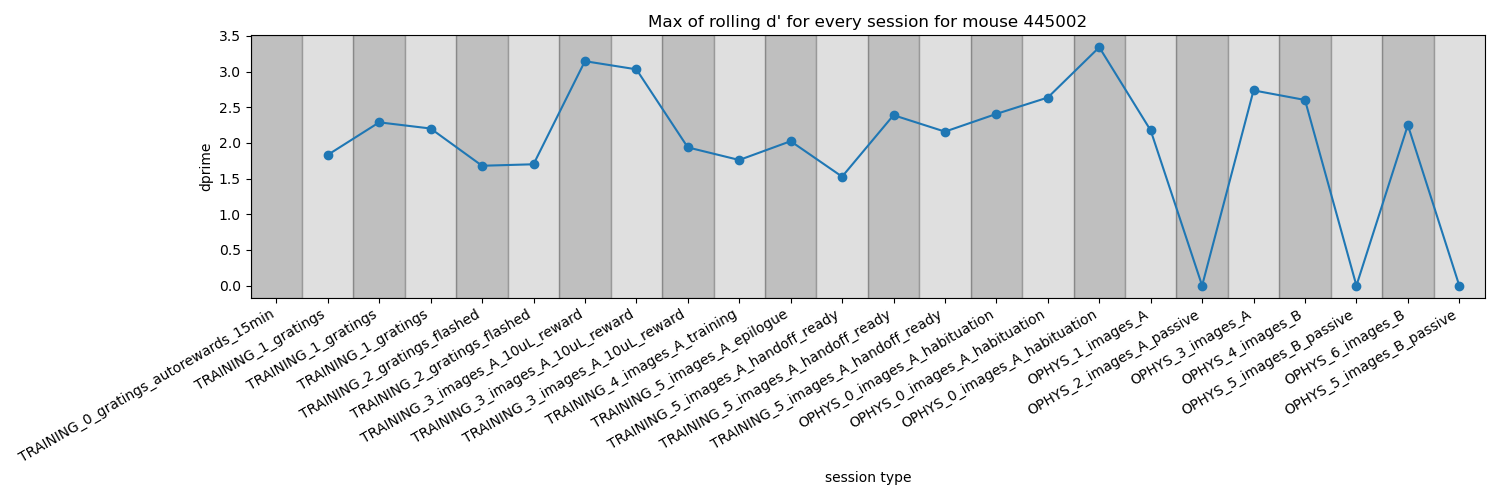

In [27]:
fig, ax = plt.subplots(figsize = (15,5))

ax.plot(
    np.arange(len(this_mouse_table)),
    this_mouse_table['max_dprime'],
    marker = 'o'
)
ax.set_xticks(range(len(this_mouse_table)))
ax.set_xticklabels(list(this_mouse_table['session_type'].values),rotation = 30, ha='right')

# make alternating black/gray vspans for visual clarity
colors = ['black', 'gray']
for ii in range(len(this_mouse_table)):
    ax.axvspan(ii - 0.5, ii + 0.5, color = colors[ii%2], alpha=0.25)

ax.set_xlim(-0.5, len(this_mouse_table) - 0.5)
ax.set_ylabel('dprime')
ax.set_xlabel('session type')
ax.set_title("Max of rolling d' for every session for mouse {}".format(mouse_id))
fig.tight_layout()

In [33]:
this_mouse_table[['mouse_id','date_of_acquisition','session_type','prior_exposures_to_session_type', 'prior_exposures_to_image_set']]

,mouse_id,date_of_acquisition,session_type,prior_exposures_to_session_type,prior_exposures_to_image_set
behavior_session_id,,,,,
837658854,445002,2019-03-15 14:49:24.015,TRAINING_0_gratings_autorewards_15min,0,NaN
838515247,445002,2019-03-18 13:44:01.474,TRAINING_1_gratings,0,NaN
839219841,445002,2019-03-19 12:50:12.068,TRAINING_1_gratings,1,NaN
839565422,445002,2019-03-20 13:16:44.461,TRAINING_1_gratings,2,NaN
839912316,445002,2019-03-21 12:54:25.388,TRAINING_2_gratings_flashed,0,NaN
840581827,445002,2019-03-22 12:56:37.162,TRAINING_2_gratings_flashed,1,NaN
841426832,445002,2019-03-25 13:33:53.275,TRAINING_3_images_A_10uL_reward,0,NaN
841827774,445002,2019-03-26 12:43:01.470,TRAINING_3_images_A_10uL_reward,1,NaN
842385277,445002,2019-03-27 12:13:04.923,TRAINING_3_images_A_10uL_reward,2,NaN
